<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Explicación del proceso de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos. Impacto de transformaciones y reducción en un clasificador</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remihuro@hotmail.com

En esta práctica aprenderás los fundamentos y el proceso del algoritmo PCA para reducir la dimensionalidad de los datos. Además, mediante pipelines aplicarás transformaciones numéricas, reducción de dimensionalidad y clasificación. De esta manera, evaluarás los modelos y analizarás el impacto de las transformaciones y la reducción en un problema de clasificación. 

Esta guía de práctica está estructurada de la siguiente manera:

- [Fundamentos de algoritmos de reducción y extracción](#fundamentos-seleccion-extraccion)

- [Fundamentos de Análisis de Componentes Principales (PCA)](#fundamentos-pca)

- [Proceso general de PCA](#proceso-pca)

- [Proceso de PCA con ejemplo](#proceso-ejemplo-pca)

- [PCA con sklearn](#pca-sklearn)

- [Transformación, reducción y clasificación](#integracion)

- [Conclusiones](#Conclusiones)

- [Referencias y enlaces](#Referencias-enlaces)

<div id="fundamentos-seleccion-extraccion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Algoritmos de reducción y extracción</h2> </div>

Las **CPUs** son versátiles y adecuadas para una amplia variedad de tareas, pero pueden ser menos eficientes en comparación con las GPUs y TPUs para cálculos altamente paralelos.

Las **GPUs** son excelentes para tareas relacionadas con gráficos y cargas de trabajo de procesamiento paralelo, pero pueden no ser eficientes para tareas de propósito general.

Las **TPUs** (diseñado por Google) son ideales para acelerar el aprendizaje profundo y las redes neuronales, pero tienen un alcance limitado en comparación con las GPUs o CPUs para otras aplicaciones.

Con la disponibilidad de CPU, GPU y TPU de alto rendimiento, es bastante posible resolver problemas de regresión, clasificación, agrupación y otros problemas relacionados mediante el aprendizaje automático y los modelos de aprendizaje profundo. Sin embargo, todavía hay varios factores que causan cuellos de botella en el rendimiento al desarrollar dichos modelos. Un gran número de características en el conjunto de datos es uno de los factores que afectan tanto el tiempo de entrenamiento como la precisión de los modelos de aprendizaje automático. Entrenar a los modelos con el número original de variables, puede llegar a tardar mucho tiempo si el número de variables es demasiado alto. 

Hay varias alternativas para lidiar con una gran cantidad de características en un conjunto de datos:

- **Reducir el número de dimensiones mediante la fusión de variables y con técnicas de reducción de dimensionalidad**: se utilizan diferentes técnicas estadísticas para este propósito como análisis discriminante lineal, análisis factorial, análisis de componentes principales, etc.
- **Extraer/seleccionar las características más importantes del conjunto de datos que son responsables de la varianza máxima en la salida:** con técnicas de selección de características.

Cuando se trabaja con conjuntos de datos a gran escala, la reducción o selección de características de alta dimensionalidad desempeña un papel crucial en la mejora del rendimiento y la interpretabilidad de los modelos de aprendizaje automático. 

**Algunas técnicas:** PCA, LDA, Features Selection, SVD, Word Embeddings (en NLP), Autoencoders, Kernel Tricks, Redes Convolucionales, Wavelet Transform (en imágenes y señales), Histogramas de Gradientes Orientados (HOG para detectar objetos en visión por computadora), entre otras.

<div id="fundamentos-pca" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Análisis de Componentes Principales (PCA)</h2> </div>

El análisis de componentes principales, o PCA, es una técnica para transformar un conjunto de datos original a un modelo de menor cantidad de variables (convertir datos de alta dimensión en datos de baja dimensión) mediante la composición de las características más importantes que capturan la **máxima información (varianza)** sobre el conjunto de datos. Las características se seleccionan sobre la base de la varianza que causan en la salida. La característica que causa la mayor variación es el primer componente principal. La característica que es responsable de la segunda varianza más alta se considera el segundo componente principal, y así sucesivamente. 

- PCA encuentra las direcciones principales de variabilidad en los datos y proyecta los datos originales en un espacio de menor dimensión. Esto ayuda a eliminar la correlación y reduce la redundancia de las características.

- Identifica correlaciones y dependencias entre las características. Esto sirve para identificar información sesgada y redundante que afecta el rendimiento.

- El tiempo de entrenamiento de los algoritmos se reduce significativamente con menos variables.

Es imperativo mencionar que un conjunto de características debe normalizarse antes de aplicar PCA. La escala de variación de las características debe ser similar. Si es que se aplica PCA en un conjunto de características con distintas escalas, las cargas resultantes para las características con alta variación también serán grandes. Por lo tanto, los componentes principales se desviarán hacia características con alta varianza, lo que conducirá a resultados falsos.

PCA es una técnica que solo se puede aplicar a datos numéricos. Por lo tanto, se requiere que las características categóricas se conviertan en características numéricas antes de poder aplicar PCA.

**En resumen:**

<p style="background-color: #0074E4; color: white; padding: 10px; font-size: 18px;">
        Los componentes principales son el nuevo conjunto de variables que se obtienen del conjunto inicial de variables
</p>

<p style="background-color: #0074E4; color: white; padding: 10px; font-size: 18px;">
        Los componentes principales son altamente significantes e independientes entre ellos (no correlacionados)
</p>

<p style="background-color: #0074E4; color: white; padding: 10px; font-size: 18px;">
        El primer componente principal almacena la máxima información posible y el segundo almacena la información máxima restante y así sucesivamente
</p>

<div id="proceso-pca" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Proceso general de PCA</h2> </div>

<div id="pasos-pca" style="color:#106ba3"><h3>Pasos del algoritmo PCA</h3> </div>

1. Estandarizar los datos
2. Computar la matriz de covarianzas
3. Calcular eigenvectors y eigenvalues
4. Computar los Componentes Principales
5. Selección de número de componentes y reducción de dimensiones

<div id="paso1-pca" style="color:#106ba3"><h3>Paso 1. Estandarizar los datos</h3> </div>

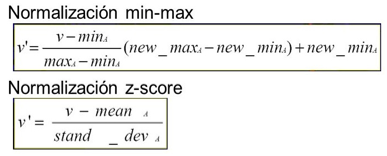

<div id="paso2-pca" style="color:#106ba3"><h3>Paso 2. Computar la matriz de covarianzas</h3> </div>

Se calcula la matriz de covarianzas entre las variables. Esta matriz es cuadrática (n x n). Esta matriz muestra cómo cada par de variables se relaciona entre sí y cómo varían juntas.

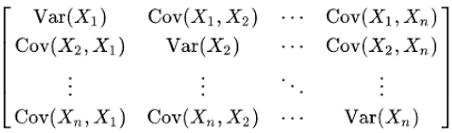

<div id="paso3-pca" style="color:#106ba3"><h3>Paso 3. Calcular eigenvectors y eigenvalues</h3> </div>

En términos generales, los eigenvectores son **vectores propios** que representan direcciones en el espacio de variables originales. Los eigenvalues son **valores propios** asociados a esos vectores y representan la cantidad de varianza explicada por cada eigenvector.

Los eigenvectores y eigenvalores corresponden a números y vectores asociados a matrices cuadradas. Dada una matriz A de n×n, su eigenvector "v" es una matriz n×1 tal que:

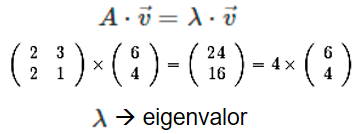

La máxima cantidad de eigenvectores es: #MaxCP=min(observaciones, variables). Ejemplo: si #observaciones=15 y #variables=11, entonces, min(15, 11) = 11

- Los **eigenvectores** de una matriz son todos aquellos que, al ser multiplicados por esta matriz, resulten en el mismo vector o en un múltiplo entero de él.
- Los **eigenvalores** miden la cantidad de variabilidad (varianza) retenida por cada componente principal (siendo mayores para la primera componente principal que para el resto), por lo que pueden usarse para determinar el número de componentes principales a retener.

Los eigenvalues indican cuánto se escala el eigenvector en esa dirección. Por lo tanto, los eigenvectores representan las direcciones principales a lo largo de las cuales los datos varían, y los eigenvalues indican cuánta varianza se explica en esas direcciones. En PCA, se selecciona un subconjunto de estos eigenvectores (componentes principales) para reducir la dimensionalidad de los datos mientras se conserva la mayor cantidad posible de varianza.

<div id="paso4-pca" style="color:#106ba3"><h3>Paso 4. Computar los Componentes Principales</h3> </div>

Los vectores propios y los valores propios se ordenan en orden descendente, donde el vector propio con el valor propio más alto es el más significativo y, por lo tanto, forma el **primer componente principal**. Los componentes principales de menor importancia pueden así eliminarse para reducir las dimensiones de los datos.

Para reducir la dimensionalidad de los datos, se puede elegir un subconjunto de los componentes principales (es decir, eigenvectores). Al proyectar los datos originales en el espacio definido por estos componentes principales, se obtiene una nueva representación de los datos en un espacio de menor dimensión.

**Matriz reducida:** producto entre el conjunto de datos y los eigenvectores seleccionados.  

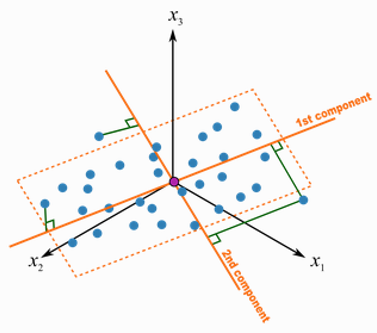

<div id="paso5-pca" style="color:#106ba3"><h3>Paso 5. Selección de número de componentes y reducción de dimensiones</h3> </div>

Para seleccionar las dimensiones adecuadas, sin perder información valiosa podemos seguir 3 métodos:
- **Método 1:** elegimos arbitrariamente las primeras n dimensiones (las más importantes). Por ejemplo, si lo que queremos es poder graficar en 3 dimensiones, podríamos tomar las 3 características nuevas y más relevantes, y usarlas como los ejes X, Y, Z.
- **Método 2:** calcular la proporción de variación explicada de cada característica e ir tomando dimensiones hasta alcanzar un mínimo que nos propongamos, por ejemplo, hasta alcanzar a explicar el 85% de la variabilidad total.
- **Método 3:** crear una gráfica especial a partir del método 2 y seleccionar cuántas dimensiones usaremos por el método del codo en donde identificamos visualmente el punto en donde se produce una caída significativa en la variación explicada relativa a la característica anterior.

<div id="proceso-ejemplo-pca" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Proceso de PCA con ejemplo</h2> </div>

<div id="carga" style="color:#106ba3"><h3>Carga de datos</h3> </div>

**Dataset: heart-disease**

- Enlace: https://www.kaggle.com/ronitf/heart-disease-uci

- Enlace: https://archive.ics.uci.edu/ml/datasets/heart+Disease

Esta conjunto de datos contiene 76 atributos, pero todos los experimentos publicados se refieren al uso de un subconjunto de 14 de ellos. En particular, la base de datos de Cleveland es la única que ha sido utilizada por investigadores de ML para esta fecha. El campo "objetivo" se refiere a la presencia de enfermedad cardíaca en el paciente. Tiene un valor entero de 0 (sin presencia) a 4. Los experimentos con la base de datos de Cleveland se han concentrado en el simple intento de distinguir la presencia (valores 1, 2, 3, 4) de la ausencia (valor 0).

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = "heart.csv"
#df = pd.read_csv(dataset, names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])
df = pd.read_csv(dataset)
#df = df.iloc[1:]
print(df.shape)
df.head(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<div id="estan" style="color:#106ba3"><h3>Paso 1: Estandarización de X</h3> </div>

In [2]:
# Se separa la variable objetivo (dependiente) de las variables independientes X
Y=df['target']
df=df.drop(['target'], axis=1)
print(df.shape)
df.head()

(303, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
# Se estandariza a una escala única (media = 0 y varianza = 1) que es necesario para un mejor rendimiento
from sklearn.preprocessing import StandardScaler
x = df.values
# Se transforma las variables mediante estandarización
#X_std = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
X_std = StandardScaler().fit_transform(x)
#print(X_std)
n_samples=X_std.shape[0]
print("********** Cantidad de observaciones (samples):",n_samples)
n_features=X_std.shape[1]
print("********** Cantidad de variables (features):",n_features)
print("Se ha transformado los datos")

********** Cantidad de observaciones (samples): 303
********** Cantidad de variables (features): 13
Se ha transformado los datos


<div id="covarianzas" style="color:#106ba3"><h3>Paso 2: Cáculo de matriz de covarianzas</h3> </div>

In [5]:
#Se calcula la matriz de covarianzas nxn, en este caso, 13x13 
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('********** Matriz de covarianzas:')
print(cov_mat)

********** Matriz de covarianzas:
[[ 1.00331126 -0.09877258 -0.06888034  0.28027591  0.2143855   0.12170933
  -0.1165957  -0.39984155  0.09712136  0.21070797 -0.16937323  0.27724123
   0.06822655]
 [-0.09877258  1.00331126 -0.0495163  -0.0569568  -0.19856751  0.0451809
  -0.05838897 -0.04416567  0.1421329   0.09641107 -0.03081226  0.11865301
   0.2107366 ]
 [-0.06888034 -0.0495163   1.00331126  0.0477654  -0.07715904  0.09475676
   0.04456768  0.29674147 -0.39558583 -0.1497243   0.120113   -0.18165254
  -0.16227112]
 [ 0.28027591 -0.0569568   0.0477654   1.00331126  0.12358207  0.17811839
  -0.11448061 -0.04685236  0.06784001  0.19385626 -0.12187682  0.10172471
   0.06241588]
 [ 0.2143855  -0.19856751 -0.07715904  0.12358207  1.00331126  0.01333762
  -0.15154021 -0.00997275  0.06724471  0.05413057 -0.00405114  0.07074441
   0.09913015]
 [ 0.12170933  0.0451809   0.09475676  0.17811839  0.01333762  1.00331126
  -0.08446783 -0.00859548  0.02575013  0.00576625 -0.0600925   0.13843621
  -0

<div id="eigenvectors" style="color:#106ba3"><h3>Paso 3.1: Calculo de eigenvectors y eigenvalues de la matriz de covarianzas</h3> </div>

Se calcula los eigenvectors y eigenvalues a partir de la matriz de covarianzas. Recuerda que los eigenvectors son todos aquellos que, al ser multiplicados por esta matriz, resulten en el mismo vector o en un múltiplo entero de él (es decir, escalado).

Utilizaremos el módulo numpy.linalg que permite la resolución de sistemas de ecuaciones lineales, descomposiciones matriciales, cálculo de determinantes, valores propios y vectores propios, entre otros.

In [6]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('********** Eigenvectors:')
print(eig_vecs)
print('********** Eigenvalues:')
print(eig_vals)
print('********** Varianza total:')
print(eig_vals.sum())

********** Eigenvectors:
[[ 0.31420252  0.40614872  0.18181083  0.54823509 -0.09407661 -0.0206618
  -0.14054369  0.30715312  0.12829615  0.22373018 -0.2624772   0.37900026
   0.01672242]
 [ 0.09083783 -0.37779171  0.06093808 -0.01101603  0.55484915 -0.25530873
  -0.28760018 -0.0507044  -0.05496875  0.16250682 -0.17599193  0.1989252
  -0.53561904]
 [-0.27460749  0.29726609  0.00635061 -0.09720829  0.35697431  0.28790041
   0.59428374 -0.16317945  0.19341117  0.21538959  0.04794993  0.35143235
  -0.16435134]
 [ 0.18392019  0.43818675  0.0201296  -0.25872142  0.2038493   0.02260103
  -0.06413037 -0.18813809  0.17945982 -0.33276335 -0.59533383 -0.35039179
  -0.07152427]
 [ 0.11737503  0.36451402 -0.00745311 -0.18379048 -0.40782498 -0.34340982
  -0.10887361 -0.3200667   0.10472957 -0.04932936  0.37238051  0.1539752
  -0.49516986]
 [ 0.07363999  0.31743328 -0.12716692  0.02472959  0.48173624 -0.06860532
  -0.14210271  0.23344184 -0.24961364 -0.51081821  0.43286301  0.17700437
   0.15369572]


<div id="ordeneigenvalues" style="color:#106ba3"><h3>Paso 3.2: Ordenar los eigenvalues</h3> </div>

In [7]:
# Lista ordenada de eigenvalues (de mayor a menor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#print(eig_pairs)
puntuados=sorted(eig_pairs, key=lambda x: (x[0], x[1]), reverse=True)
#print(puntuados)
print('Eigenvalues (varianzas) en orden descendente:')
for i in puntuados:
    print(i[0])
    #print(i[1])

Eigenvalues (varianzas) en orden descendente:
2.7721760015554633
1.5417803882823136
1.2268834196640794
1.1850565903649013
1.025350535130935
0.9732278398471541
0.8656267811742075
0.778514733864011
0.7213060523412261
0.6236283650910318
0.5318600784047024
0.42454351449410016
0.3730920574017728


<div id="determinar-componentes" style="color:#106ba3"><h3>4. Determinar componentes</h3> </div>

In [8]:
num_components_max = min(n_samples, n_features)
print("*********** Máximo número de componentes:",num_components_max)

totalVar= eig_vals.sum()
print("*********** Varianza total (suma de eigenvalues):",totalVar)

# Aquí puedes ajustar la cantidad de componentes
num_components_seleccionados=4
print("*********** Número de componentes seleccionados:",num_components_seleccionados)
puntuadosSeleccionados=puntuados[:num_components_seleccionados]
eig_vals_seleccionados = []
eig_vecs_seleccionados = []
for i in puntuadosSeleccionados:
    #print(i[0])
    eig_vals_seleccionados.append(i[0])
    #print(i[0])
    eig_vecs_seleccionados.append(i[1])
#Transformar lista en matriz para las operaciones posteriores
eig_vecs_seleccionados = np.array(eig_vecs_seleccionados)
print(eig_vals_seleccionados)

*********** Máximo número de componentes: 13
*********** Varianza total (suma de eigenvalues): 13.043046357615898
*********** Número de componentes seleccionados: 4
[2.7721760015554633, 1.5417803882823136, 1.2268834196640794, 1.1850565903649013]


<div id="reducir-dimensionalidad" style="color:#106ba3"><h3>5. Reducir dimensionalidad</h3> </div>

Recuerda que un eigen vector debe cumplir: 

matriz de covarianzas * eigen vector = eigen value * eigen vector

En nuestro ejemplo:

(13x13) (13x1)    = escalar * (13x1)

Recuerda que al proyectar los datos originales en el espacio definido por los componentes principales seleccionados, se obtiene una nueva representación de los datos en un espacio de menor dimensión.

**Matriz reducida:** producto entre el conjunto de datos y los eigenvectores seleccionados.  

datos originales   * 4 eigenvectores = datos menor dimensión 

(303x13) (13x4) = (303x4)

In [9]:
#Obtener matriz reducida
principalComponents = np.dot(X_std,eig_vecs_seleccionados.T)
#Calcular el porcentaje de varianza de cada dimensión
explained_variance_ratio_=np.array([eig_vals_seleccionados[i]/totalVar for i in range(num_components_seleccionados)])
print('Porcentaje de varianza de cada dimension con respecto a la varianza total:')
print(explained_variance_ratio_.round(4))

a = range(num_components_seleccionados)
num_pc= a[::1]
principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)
principalDf=round(principalDf, 2)
print('Componentes Principales:')
principalDf.head()

Porcentaje de varianza de cada dimension con respecto a la varianza total:
[0.2125 0.1182 0.0941 0.0909]
Componentes Principales:


,0,1,2,3
0,0.62,2.32,2.47,2.68
1,-0.46,-0.96,1.14,2.43
2,-1.83,0.04,-0.45,0.41
3,-1.72,-0.50,0.03,-0.11
4,-0.37,0.30,-2.84,-0.81


<div id="pca-sklearn" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>PCA con sklearn</h2> </div>

In [20]:
# Se aplica PCA de sklearn. Con fit_transform se ejecutan todos los pasos de PCA
from sklearn.decomposition import PCA
# Aquí puedes ajustar la cantidad de componentes seleccionados
num_components=9
pca = PCA(num_components)
principalComponents = pca.fit_transform(X_std)
# Se obtiene los eigenvalues
eigenvalues = pca.explained_variance_
print('Eigenvalues (varianzas) en orden descendente:')

for eigenvalue in eigenvalues:
    print(eigenvalue)
a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf=round(principalDf, 2)
print('Componentes Principales:')
principalDf.head()

Eigenvalues (varianzas) en orden descendente:
2.772176001555457
1.5417803882823105
1.226883419664077
1.185056590364901
1.025350535130933
0.973227839847151
0.865626781174209
0.7785147338640105
0.721306052341226
Componentes Principales:


,0,1,2,3,4,5,6,7,8
0,0.62,2.32,2.47,2.68,0.38,1.71,-0.12,0.74,-0.64
1,-0.46,-0.96,1.14,2.43,2.27,-0.79,-0.08,1.54,1.24
2,-1.83,0.04,-0.45,0.41,0.87,0.77,-0.10,-0.06,1.29
3,-1.72,-0.50,0.03,-0.11,-0.24,-0.50,-0.14,-0.18,-0.15
4,-0.37,0.30,-2.84,-0.81,0.01,-0.09,1.42,0.61,-0.19


In [21]:
#La varianza indica cuanta información tiene cada dimensión 
#pca.explained_variance_ratio_  indica la relación de la varianza de cada dimensión con respecto al total de la varianza
print('Varianza de cada dimensión con respecto a la varianza total:')
explained_variance_ratio_=pca.explained_variance_ratio_
for varianza in explained_variance_ratio_:
    print(varianza.round(4))

Varianza de cada dimensión con respecto a la varianza total:
0.2125
0.1182
0.0941
0.0909
0.0786
0.0746
0.0664
0.0597
0.0553


**A continuación, se calcula la varianza acumulada para presentar en una figura la varianza de cada dimensión y la varianza acumulada hasta esa dimensión.**

********** Varianza acumulada: [0.213 0.331 0.425 0.516 0.594 0.669 0.735 0.795 0.85 ]


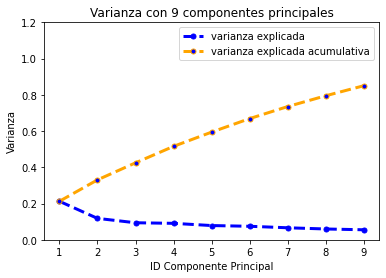

In [22]:
explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
print("********** Varianza acumulada:",explained_variance_ratio_cumsum.round(3))
num_pc= num_components
a = range(1,num_pc+1)
num_pc= a[::1]
num_pc
#Visualización de varianza por componente y varianza acumulada
plt.plot(num_pc, explained_variance_ratio_, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'varianza explicada')
plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'varianza explicada acumulativa')
plt.ylim((0,1.2))
plt.title('Varianza con '+str(num_components)+' componentes principales')
plt.xlabel('ID Componente Principal')
plt.ylabel('Varianza')
plt.legend(loc="upper right")
plt.show()

In [23]:
# Se contatena la matriz reducida con la variable objetivo Y
finalDf = pd.concat([principalDf, Y], axis = 1)
print(finalDf.shape)
finalDf.head()

(303, 10)


,0,1,2,3,4,5,6,7,8,target
0,0.62,2.32,2.47,2.68,0.38,1.71,-0.12,0.74,-0.64,1
1,-0.46,-0.96,1.14,2.43,2.27,-0.79,-0.08,1.54,1.24,1
2,-1.83,0.04,-0.45,0.41,0.87,0.77,-0.10,-0.06,1.29,1
3,-1.72,-0.50,0.03,-0.11,-0.24,-0.50,-0.14,-0.18,-0.15,1
4,-0.37,0.30,-2.84,-0.81,0.01,-0.09,1.42,0.61,-0.19,1


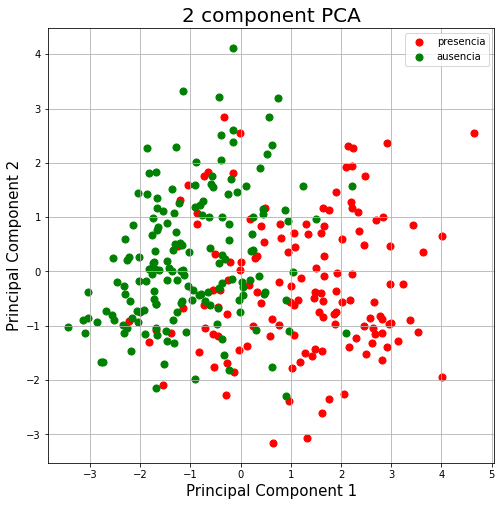

In [24]:
#Visualización 2 dimensiones
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targetsNombre = ['presencia', 'ausencia']
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targetsNombre)
ax.grid()
plt.show()

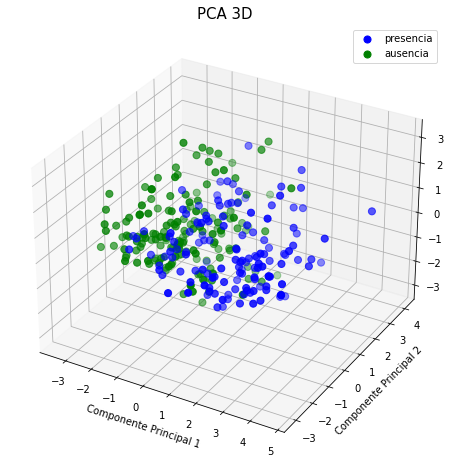

In [25]:
# Visualización 3 dimensiones
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Componente Principal 1', fontsize=10)
ax1.set_ylabel('Componente Principal 2', fontsize=10)
ax1.set_zlabel('Componente Principal 3', fontsize=10)
ax1.set_title('PCA 3D',fontsize=15)
targetsNombre = ['presencia', 'ausencia']
targets = [0, 1]
colors=['blue','green','red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , finalDf.loc[indicesToKeep, 2]
               , c=color
               , s=50)
ax1.legend(targetsNombre)
ax1.grid()
plt.show()

<div id="integracion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Transformación, reducción y clasificación</h2> </div>

En esta sección mediante **pipelines** aplicarás transformaciones numéricas, reducción de dimensionalidad y clasificación. De esta manera, evaluarás los modelos con medidas de calidad clásicas y analizarás el impacto de las transformaciones y la reducción de dimensionalidad en este problema de clasificación. Se utiliza la clase **cross_val_score** para ejecutar el entrenamiento de un modelo N veces y obtener el accuracy promedio.

In [106]:
# Función para calcular medidas de calidad clásicas de ML
def medirCalidad(y_test, y_pred):
    MAE=metrics.mean_absolute_error(y_test, y_pred)
    MSE=metrics.mean_squared_error(y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    accuracy=float(str(accuracy_score(y_test, y_pred)))

    MAE=str(round(MAE, 4))
    MSE=str(round(MSE, 4))
    RMSE=str(round(RMSE, 4))
    accuracy=str(round(accuracy, 4))

    print('Mean Absolute Error (MAE):', MAE)  
    print('Mean Squared Error (MSE):', MSE)  
    print('Root Mean Squared Error (RMSE):', RMSE) 
    print('Accuracy: ' + accuracy) 

    print('Confusion_matrix:')
    y_test_transformado = y_test
    y_pred_transformado = y_pred

    cm = confusion_matrix(y_test_transformado, y_pred_transformado)  
    #print(cm)  
    tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()  
    #print(tn,fp,fn,tp)

    precision=precision_score(y_test_transformado, y_pred_transformado)
    precision=str(round(precision, 4))
    print('Precision:',precision)

    recall=recall_score(y_test_transformado, y_pred_transformado)
    recall=str(round(recall, 4))
    print('Recall:',recall)

    f1=f1_score(y_test_transformado, y_pred_transformado)
    f1=str(round(f1, 4))
    print('F1:',f1)
    return accuracy, precision, recall, f1

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score

# Crear un DataFrame vacío con las columnas deseadas
columnas = ['MÉTODO','ACC']
# Definr el tipo de dato de cada columna
tipos_de_variable = [str, float]
# Crear un dataframe vacío, a este dataframe se agregarán fila a fila los resultados
dataResultados = pd.DataFrame(columns=columnas)

df = pd.read_csv(dataset)
Y=df['target']
df=df.drop(['target'], axis=1)

#Aquí puedes ajustar los parámetros del clasificador
numFolds = 5 # cantidad de experimentos o Folds (pliegues)
metrica = 'manhattan' # la medida de distancia
K = 25 # la cantidad de vecinos
num_componentes = 13 # lacantidad de componentes seleccionados

# Crea el Pipeline solamente con clasificacion
steps = [
    ('clasificadorKNN', KNeighborsClassifier(n_neighbors=K, metric=metrica))  # Establece n_neighbors aquí
]
pipeline1 = Pipeline(steps)

# Crea el Pipeline con estandarización, reducción y clasificación
steps = [
    ('estandarizacion', StandardScaler(with_mean=True,with_std=True)),  # Define tu preprocesamiento aquí
    ('clasificadorKNN', KNeighborsClassifier(n_neighbors=K, metric=metrica))  # Establece n_neighbors aquí
]
pipeline2 = Pipeline(steps)

# Crea el Pipeline con normalización, reducción y clasificación
steps = [
    ('normalizacion', MinMaxScaler(feature_range=(0, 1))),
    ('clasificadorKNN', KNeighborsClassifier(n_neighbors=K, metric=metrica))  # Establece n_neighbors aquí
]
pipeline3 = Pipeline(steps)

# Crea el Pipeline con normalización, reducción y clasificación
steps = [
    ('reduccion', PCA(n_components=num_componentes)), 
    ('clasificadorKNN', KNeighborsClassifier(n_neighbors=K, metric=metrica))  # Establece n_neighbors aquí
]
pipeline4 = Pipeline(steps)

# Crea el Pipeline con normalización, reducción y clasificación
steps = [
    ('estandarizacion', StandardScaler(with_mean=True,with_std=True)),  # Define tu preprocesamiento aquí
    ('reduccion', PCA(n_components=num_componentes)), 
    ('clasificadorKNN', KNeighborsClassifier(n_neighbors=K, metric=metrica))  # Establece n_neighbors aquí
]
pipeline5 = Pipeline(steps)

# Crea el Pipeline con normalización, reducción y clasificación
steps = [
    ('normalizacion', MinMaxScaler(feature_range=(0, 1))),
    ('reduccion', PCA(n_components=num_componentes)), 
    ('clasificadorKNN', KNeighborsClassifier(n_neighbors=K, metric=metrica))  # Establece n_neighbors aquí
]
pipeline6 = Pipeline(steps)

#cantidadPasos=len(pipe.steps)
#print(pipe.get_params().keys())

ACC=cross_val_score(pipeline1, df, Y, cv=numFolds, n_jobs=-1, error_score="raise").mean()
pasos = '-'.join([elemento[0] for elemento in pipeline1.steps[:]])
fila = pd.Series([pasos,ACC], index=columnas)
dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

ACC=cross_val_score(pipeline2, df, Y, cv=numFolds, n_jobs=-1, error_score="raise").mean()
pasos = '-'.join([elemento[0] for elemento in pipeline2.steps[:]])
fila = pd.Series([pasos,ACC], index=columnas)
dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

ACC=cross_val_score(pipeline3, df, Y, cv=numFolds, n_jobs=-1, error_score="raise").mean()
pasos = '-'.join([elemento[0] for elemento in pipeline3.steps[:]])
fila = pd.Series([pasos,ACC], index=columnas)
dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

ACC=cross_val_score(pipeline4, df, Y, cv=numFolds, n_jobs=-1, error_score="raise").mean()
pasos = '-'.join([elemento[0] for elemento in pipeline4.steps[:]])
fila = pd.Series([pasos,ACC], index=columnas)
dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

ACC=cross_val_score(pipeline5, df, Y, cv=numFolds, n_jobs=-1, error_score="raise").mean()
pasos = '-'.join([elemento[0] for elemento in pipeline5.steps[:]])
fila = pd.Series([pasos,ACC], index=columnas)
dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

ACC=cross_val_score(pipeline6, df, Y, cv=numFolds, n_jobs=-1, error_score="raise").mean()
pasos = '-'.join([elemento[0] for elemento in pipeline6.steps[:]])
fila = pd.Series([pasos,ACC], index=columnas)
dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

dataResultados.head(6)

,MÉTODO,ACC
0,clasificadorKNN,0.682951
1,estandarizacion-clasificadorKNN,0.824863
2,normalizacion-clasificadorKNN,0.824918
3,reduccion-clasificadorKNN,0.666667
4,estandarizacion-reduccion-clasificadorKNN,0.828251
5,normalizacion-reduccion-clasificadorKNN,0.802022


In [109]:
#Con el mejor modelo se calcula las predicciones y se mide la calidad en detalle
pipe=pipeline5
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2)#random_state = 0
pipe.fit(X_train, y_train)#modelNN__validation_split=0.1, modelNN__batch_size=10

y_pred = (pipe.predict(X_test) > 0.5).astype("int32")
y_pred=y_pred.flatten()# de 2D a 1D
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

accuracy, precision, recall, f1=medirCalidad(y_test, y_pred)

Mean Absolute Error (MAE): 0.1639
Mean Squared Error (MSE): 0.1639
Root Mean Squared Error (RMSE): 0.4049
Accuracy: 0.8361
Confusion_matrix:
Precision: 0.7838
Recall: 0.9355
F1: 0.8529


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

Hemos aprendido el proceso de reducción de dimensionalidad mediante la técnica de análisis de componentes principales. Hemos creado varios modelos mediante pipelines para comparar los modelos en términos de accuracy. Los resultados demuestran la importancia de un proceso previo de transformación y de reducción de dimensionalidad. En promedio, el clasificador sin ningún proceso previo obtiene un accuracy de 0.682, mientras que, el mejor modelo está conformado por una estandarización y reducción previo al clasificador. El mejor modelo obtiene un accuracy de 0.828 en promedio.

<div id="Referencias" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

***Enlace de documentación:***

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html